In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

In [2]:
# 📍 sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "Sources")))

# 📥 Import load fonction
from data_loader import load_data

In [3]:
#### ✅ Raw Data

In [4]:
df_Copper_Original = load_data('raw', 'Com_Copper.csv')

# 🕒 'Date'in datetime
df_Copper_Original['Date'] = pd.to_datetime(df_Copper_Original['Date'], format='%d/%m/%Y')

# 🔍 vieuw
print(df_Copper_Original.head(2))

✅ Load File : /Users/juniormukenze/Documents/00 Personal Research Publication/Research Paper 1/Enhancing Time Series Forecasting with VAE-based Data Augmentation and Temporal Pattern Analysis using Neural Networks/Modules/data/raw/Com_Copper.csv  |  Separator detected: ';'
    Symbol       Date    Open    High     Low   Close
0  HG1:COM 2024-08-19  4.1500  4.2005  4.1415  4.1805
1  HG1:COM 2024-08-16  4.1425  4.1635  4.0950  4.1435


In [5]:
#### ✅ Generated Data

In [6]:
df_bilstmVAE = load_data('generated', 'SynBilstmVAE.csv')
df_timeVAE = load_data('generated', 'SynTimeVAE.csv')
df_denseVAE = load_data('generated', 'SynDenseVAE.csv')
df_conv1DVAE = load_data('generated', 'SynCon1DVAE.csv')

# 🔍 view
print(df_bilstmVAE.head(2))

✅ Load File : /Users/juniormukenze/Documents/00 Personal Research Publication/Research Paper 1/Enhancing Time Series Forecasting with VAE-based Data Augmentation and Temporal Pattern Analysis using Neural Networks/Modules/data/generated/SynBilstmVAE.csv  |  Separator detected: ','
✅ Load File : /Users/juniormukenze/Documents/00 Personal Research Publication/Research Paper 1/Enhancing Time Series Forecasting with VAE-based Data Augmentation and Temporal Pattern Analysis using Neural Networks/Modules/data/generated/SynTimeVAE.csv  |  Separator detected: ','
✅ Load File : /Users/juniormukenze/Documents/00 Personal Research Publication/Research Paper 1/Enhancing Time Series Forecasting with VAE-based Data Augmentation and Temporal Pattern Analysis using Neural Networks/Modules/data/generated/SynDenseVAE.csv  |  Separator detected: ','
✅ Load File : /Users/juniormukenze/Documents/00 Personal Research Publication/Research Paper 1/Enhancing Time Series Forecasting with VAE-based Data Augmenta

In [9]:
df_Copper_Original['Date'] = pd.to_datetime(df_Copper_Original['Date'], format='%d/%m/%Y')
df_Copper_Original.drop(["Symbol"], axis=1, inplace=True)
df_Copper_Original.sort_values('Date', inplace=True)

df_timeVAE.sort_values('Date', inplace=True)
df_bilstmVAE.sort_values('Date', inplace=True)
df_conv1DVAE.sort_values('Date', inplace=True)
df_denseVAE.sort_values('Date', inplace=True)

In [10]:
Original = df_Copper_Original["Close"].values
timeVAE = df_timeVAE["Close"].values
bilstmVAE = df_bilstmVAE["Close"].values
conv1DVAE = df_conv1DVAE["Close"].values
denseVAE = df_denseVAE["Close"].values

In [11]:
Original.shape, timeVAE.shape, bilstmVAE.shape, conv1DVAE.shape, denseVAE.shape

((2834,), (2834,), (2834,), (2834,), (2834,))

# Application of the Fourier transform

In [13]:
from scipy.fft import fft, fftfreq

# Apply FFT
fft_orig = fft(Original)
fft_timeVAE = fft(timeVAE)
fft_bilstmVAE = fft(bilstmVAE)
fft_conv1DVAE = fft(conv1DVAE)
fft_denseVAE = fft(denseVAE)

# Associated frequencies
N = len(Original)
T = 1  # 1 unit of time (e.g. days)
freqs = fftfreq(N, T)[:N // 2]

# Modules of frequency components (amplitudes)
amp_orig = np.abs(fft_orig)[:N // 2]
amp_timeVAE = np.abs(fft_timeVAE)[:N // 2]
amp_bilstmVAE = np.abs(fft_bilstmVAE)[:N // 2]
amp_conv1DVAE = np.abs(fft_conv1DVAE)[:N // 2]
amp_denseVAE = np.abs(fft_denseVAE)[:N // 2]


# Comparative visualization

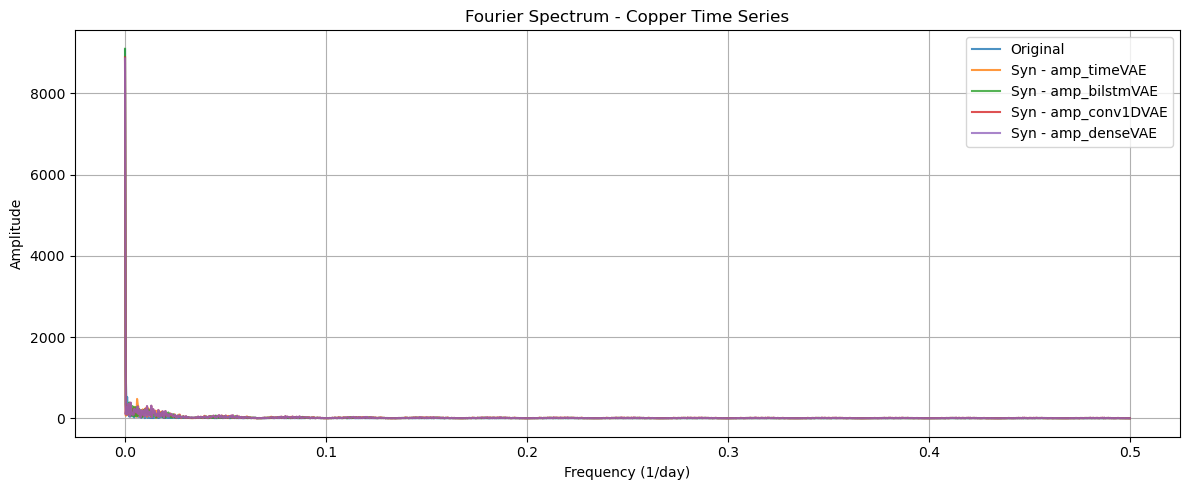

In [15]:
plt.figure(figsize=(12, 5))
plt.plot(freqs, amp_orig, label="Original", alpha=0.8)
plt.plot(freqs, amp_timeVAE, label="Syn - amp_timeVAE", alpha=0.8)
plt.plot(freqs, amp_bilstmVAE, label="Syn - amp_bilstmVAE", alpha=0.8)
plt.plot(freqs, amp_conv1DVAE, label="Syn - amp_conv1DVAE", alpha=0.8)
plt.plot(freqs, amp_denseVAE, label="Syn - amp_denseVAE", alpha=0.8)
plt.title("Fourier Spectrum - Copper Time Series")
plt.xlabel("Frequency (1/day)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


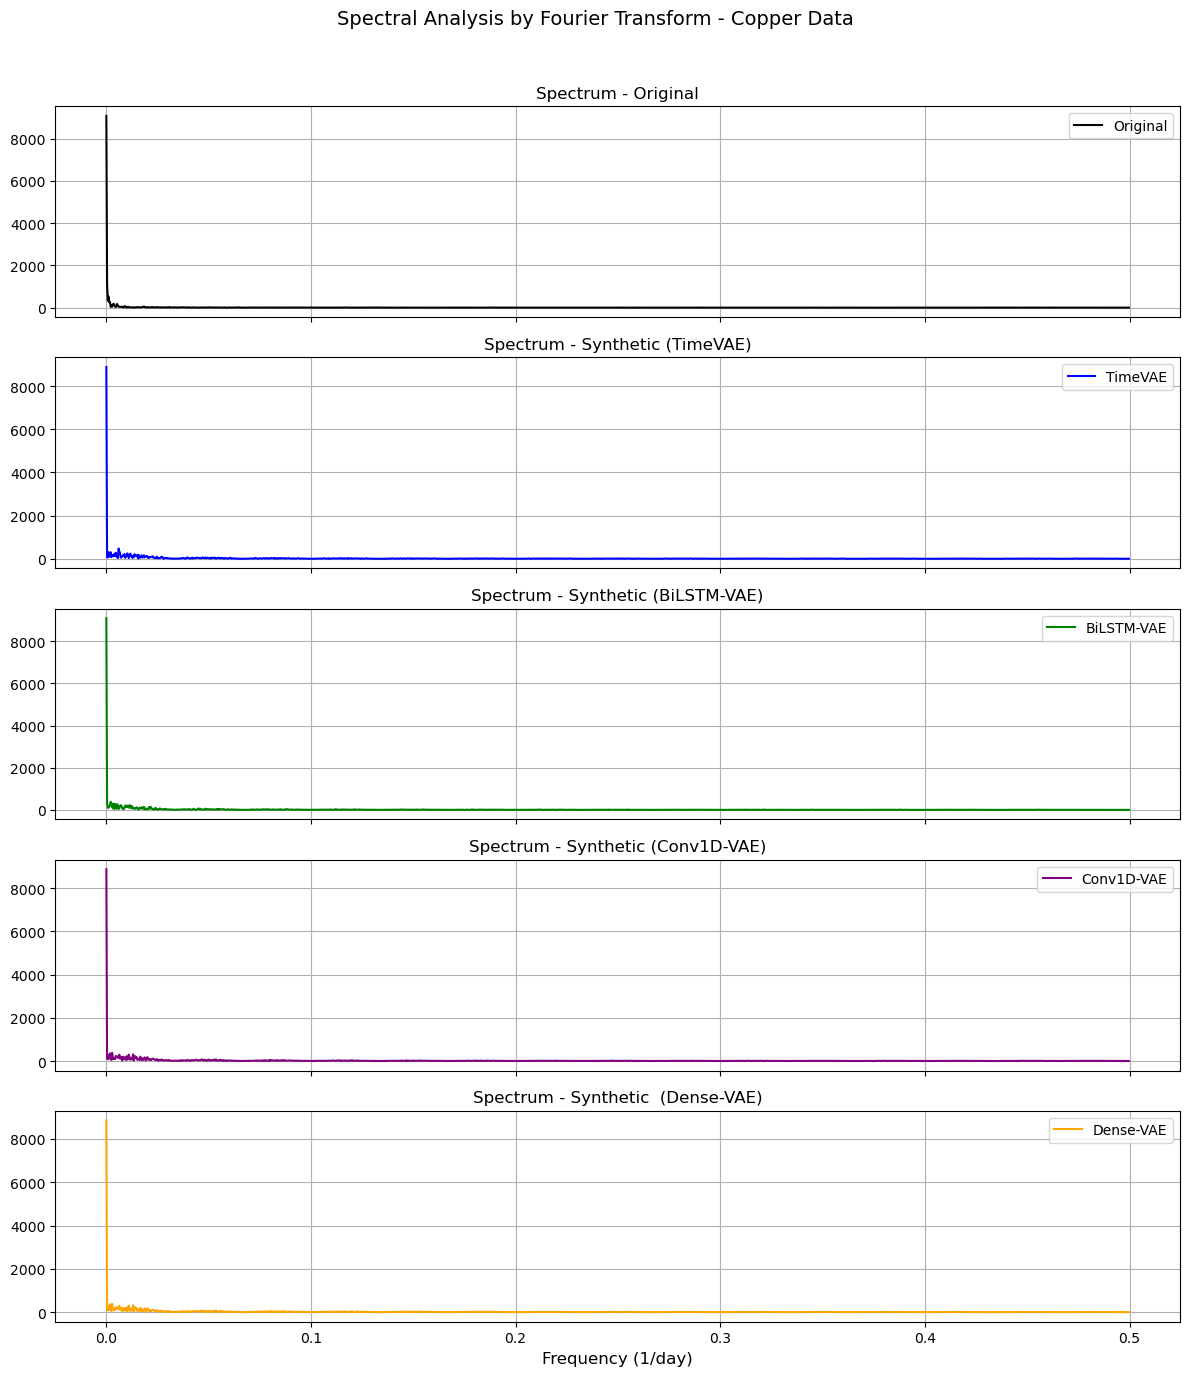

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Convertir en vecteurs NumPy 1D
Original     = np.asarray(Original)
timeVAE      = np.asarray(timeVAE)
bilstmVAE    = np.asarray(bilstmVAE)
conv1DVAE    = np.asarray(conv1DVAE)
denseVAE     = np.asarray(denseVAE)

# Paramètres
N = len(Original)
T = 1  # Pas d’échantillonnage (1 jour si daily)

# Fréquences FFT
freqs = fftfreq(N, T)[:N // 2]

# Spectres d’amplitude
def get_amplitude(signal):
    return np.abs(fft(signal))[:N // 2]

amp_orig      = get_amplitude(Original)
amp_timeVAE   = get_amplitude(timeVAE)
amp_bilstmVAE = get_amplitude(bilstmVAE)
amp_conv1DVAE = get_amplitude(conv1DVAE)
amp_denseVAE  = get_amplitude(denseVAE)

# Visualisation avec 5 sous-graphes
fig, axs = plt.subplots(5, 1, figsize=(12, 14), sharex=True)

axs[0].plot(freqs, amp_orig, color='black', label="Original")
axs[0].set_title("Spectrum - Original", fontsize=12)
axs[0].legend()
axs[0].grid(True)

axs[1].plot(freqs, amp_timeVAE, color='blue', label="TimeVAE")
axs[1].set_title("Spectrum - Synthetic (TimeVAE)", fontsize=12)
axs[1].legend()
axs[1].grid(True)

axs[2].plot(freqs, amp_bilstmVAE, color='green', label="BiLSTM-VAE")
axs[2].set_title("Spectrum - Synthetic (BiLSTM-VAE)", fontsize=12)
axs[2].legend()
axs[2].grid(True)

axs[3].plot(freqs, amp_conv1DVAE, color='purple', label="Conv1D-VAE")
axs[3].set_title("Spectrum - Synthetic (Conv1D-VAE)", fontsize=12)
axs[3].legend()
axs[3].grid(True)

axs[4].plot(freqs, amp_denseVAE, color='orange', label="Dense-VAE")
axs[4].set_title("Spectrum - Synthetic  (Dense-VAE)", fontsize=12)
axs[4].legend()
axs[4].grid(True)

# Axes globaux
plt.xlabel("Frequency (1/day)", fontsize=12)
fig.suptitle("Spectral Analysis by Fourier Transform - Copper Data", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Frequency similarity index --> 	> 0.95 desired

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

sim_Orig_TimeVAE = cosine_similarity([amp_orig], [amp_timeVAE])[0][0]
print(f"Frequency similarity (cosine) - Original vs TimeVAE  : {sim_Orig_TimeVAE:.4f}")

sim_Orig_bilstmVAE = cosine_similarity([amp_orig], [amp_bilstmVAE])[0][0]
print(f"Frequency similarity (cosine) - Original vs bilstmVAE  : {sim_Orig_bilstmVAE:.4f}")

sim_Orig_conv1DVAE = cosine_similarity([amp_orig], [amp_conv1DVAE])[0][0]
print(f"Frequency similarity (cosine) - Original vs conv1DVAE  : {sim_Orig_conv1DVAE:.4f}")

sim_Orig_denseVAE = cosine_similarity([amp_orig], [amp_denseVAE])[0][0]
print(f"Frequency similarity (cosine) - Original vs denseVAE  : {sim_Orig_denseVAE:.4f}")


Frequency similarity (cosine) - Original vs TimeVAE  : 0.9848
Frequency similarity (cosine) - Original vs bilstmVAE  : 0.9900
Frequency similarity (cosine) - Original vs conv1DVAE  : 0.9850
Frequency similarity (cosine) - Original vs denseVAE  : 0.9849
